In [1]:
%matplotlib inline
from __future__ import division
from itertools import groupby
import math
import copy
import tsplib95
import numpy as np
import matplotlib.pyplot as plt

In [2]:
problem = tsplib95.load('../data/domain/bays29.tsp')

In [10]:
peso = np.copy(problem.edge_weights)
masked = np.ma.masked_equal(peso, 0, copy=False)
masked = np.ma.masked_equal(peso, 0, copy=False)
problem.edge_weights[16][21] = 45
problem.dimension

29

In [4]:
#calculate distance
list(problem.get_nodes())
edge1 = 6
edge2 = 7
dist = np.min(problem.get_weight(edge1,edge2))
dist
problem.edge_weights

[[0,
  107,
  241,
  190,
  124,
  80,
  316,
  76,
  152,
  157,
  283,
  133,
  113,
  297,
  228,
  129,
  348,
  276,
  188,
  150,
  65,
  341,
  184,
  67,
  221,
  169,
  108,
  45,
  167],
 [107,
  0,
  148,
  137,
  88,
  127,
  336,
  183,
  134,
  95,
  254,
  180,
  101,
  234,
  175,
  176,
  265,
  199,
  182,
  67,
  42,
  278,
  271,
  146,
  251,
  105,
  191,
  139,
  79],
 [241,
  148,
  0,
  374,
  171,
  259,
  509,
  317,
  217,
  232,
  491,
  312,
  280,
  391,
  412,
  349,
  422,
  356,
  355,
  204,
  182,
  435,
  417,
  292,
  424,
  116,
  337,
  273,
  77],
 [190,
  137,
  374,
  0,
  202,
  234,
  222,
  192,
  248,
  42,
  117,
  287,
  79,
  107,
  38,
  121,
  152,
  86,
  68,
  70,
  137,
  151,
  239,
  135,
  137,
  242,
  165,
  228,
  205],
 [124,
  88,
  171,
  202,
  0,
  61,
  392,
  202,
  46,
  160,
  319,
  112,
  163,
  322,
  240,
  232,
  314,
  287,
  238,
  155,
  65,
  366,
  300,
  175,
  307,
  57,
  220,
  121,
  97],
 [80,
  127,


### I discover that I can make a deepcopy of the array, but just to remember I'll let this file here.

In [3]:
weights = np.copy(problem.edge_weights)
weight_copy = copy.deepcopy(weights)

### Testing array slices

In [4]:
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
arr[1, :]

array([ 6,  7,  8,  9, 10])

### Deep copy again

In [7]:
pop = np.zeros((29,29))
pop = np.random.randint(0, 1+1, size=(29,29))
fit = copy.deepcopy(pop)
print("First -> ",pop[5][5],"\n")
print("Copy -> ",fit[5][5],"\n")
pop[5][5] = 5
print("First -> ",pop[5][5],"\n")
print("Copy -> ",fit[5][5],"\n")

First ->  1 

Copy ->  1 

First ->  5 

Copy ->  1 



In [8]:
pop = np.zeros((29,29))
pop = np.random.randint(0, 1+1, size=(29,29))
fit = np.copy(pop)
print("First -> ",pop[5][5],"\n")
print("Copy -> ",fit[5][5],"\n")
pop[5][5] = 5
print("First -> ",pop[5][5],"\n")
print("Copy -> ",fit[5][5],"\n")

First ->  0 

Copy ->  0 

First ->  5 

Copy ->  0 



### Made a generation of at least one sheep for city (line)

In [5]:
# The first city is 0
# Need to put at least one sheep per city

# Create a random number each iteration and after that made a line of the matrix receive that number
def generate_city(n: int, dim: int) -> list:
    city_matrix = np.zeros((n, dim))
    for i in range(n):
        sheep = np.random.randint(0, dim)
        for j in range(dim):
            if (sheep == j):
                city_matrix[i][j] = 1
    
    return city_matrix

def print_position_of_sheep(city_matrix: list):
    for i in range(len(city_matrix)):
        for j in range(len(city_matrix)):
            if (city_matrix[i][j] != 0):
                print("Position -> ",j,"\n") 

In [6]:
# Create a function to verify if a certain route is valid
# Need to think in situations where the route is not valid

def city_choice(n: int) -> list:
    route = []
    city = []
    sheep = np.random.randint(0, n)

    for map in range(n):
        city.append(map)
    
    while len(city) != 0:
        if sheep not in city:
            sheep = np.random.randint(0, n)
        else:
            route.append(sheep)
            city.remove(sheep)

    return route

def same_cities(route: list) -> bool:
    same = False
    aux = route[-1]
    i = 1
    j = 1
    while i != (len(route) - 2):
        if (aux == route[j]):
            same = True
            #print("Equal value -> ", route[j], "\nAux value -> ", aux,"\n")
            break
        j += 1
        if (j == (len(route) - 1)):
            aux = route[i]
            i += 1
            j = 1

    return same    

# Function to create route
def create_route(city_matrix: list) -> list:
    route = []
    route.append(0)
    for i in range(len(city_matrix)):
        for j in range(len(city_matrix)):
            if (city_matrix[i][j] == 1):
                route.append(j)
    print("Route -> ",route,"\n")

    return route

def verify_route(city_matrix: list) -> bool:
    # Append each position in a list, after that verify if the route is valid in a different ways
    valid = True
    for i in range(len(city_matrix)):
        for j in range(len(city_matrix)):
            if (city_matrix[i][j] == 1 and i == (len(city_matrix) - 1) and j != 0):
                valid = False

    return valid

def punishment(city_matrix: list, route: list, weight: int) -> list:
    aux_verify = verify_route(city_matrix)
    aux_route = same_cities(route)
    position = route[1]
    if (aux_route == True or aux_verify == False):
        city_matrix[0][position] *= np.power(weight, 2)
    
    return city_matrix

In [11]:
#print_position_of_sheep(generate_city(30, 30))
n = 30
dim = 30
#city_matrix = generate_city(n, dim)
#route = create_route(city_matrix)
#print("", same_cities(route),"\nPunishment function -> ",punishment(city_matrix, route, np.max(problem.edge_weights)),"\n")
print(city_choice(n))

[28, 11, 27, 13, 26, 9, 23, 14, 7, 5, 4, 17, 2, 25, 22, 29, 24, 16, 10, 15, 18, 21, 6, 1, 12, 19, 0, 20, 8, 3]


In [14]:
np.max(problem.edge_weights)

509

### Plotting a graph in 3d

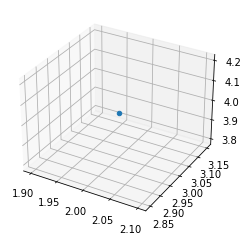

In [4]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(2,3,4)

plt.show()

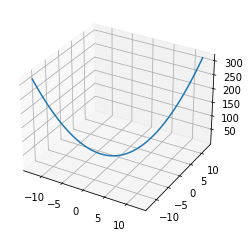

In [5]:
x = np.linspace(-4*np.pi, 4*np.pi,50)

y = np.linspace(-4*np.pi,4*np.pi,50)

z = x**2 + y**2

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(x,y,z)

plt.show()

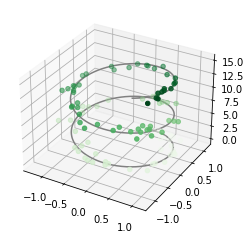

In [6]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15*np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

OSError: '_mpl-gallery-nogrid' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles